"We certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that we did not receiveany external help, coaching or contributions during the production of this work."
<br>
<br>
Ram Chandra Bhavirisetty <br>
Tejaswi Raavi<br>

<h1>PART 2</h1>

In [66]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping as e_stopping
from keras.callbacks import LearningRateScheduler as lrs

In [67]:
data = pd.read_csv("income_dataset.csv")

<h3> Step 1.3 Analyzing The Data </h3>

In [68]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [70]:
data.shape

(32561, 15)

In [71]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [72]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<h3> Step 1.4 Preprocessing The Data </h3><br>
<b><p> 1. dropping the capital.gain column </p></b>

In [73]:
data.drop(['capital.gain'],axis=1,inplace=True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,3900,40,United-States,<=50K


<b><p>2. Finding the names of the columns which contains '?' and replacing with the mode of that column .</p></b>

In [74]:
l = []
for i in data.columns:
    if '?' in set(data[i]):
        l.append(i)
l

['workclass', 'occupation', 'native.country']

In [75]:
for i in l:
    mode = data[i].mode()
    data[i].replace({'?':mode[0]},inplace = True)
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,3900,40,United-States,<=50K


<b><p> 3. Replacing categorical data with numericals. </p></b>

In [76]:
def create_dict(column):
    set_data = list(set(data[column]))
    return dict(zip(set_data,list(range(1,len(set_data)+1))))

def replace_data(column,dicts):
    data[column].replace(dicts,inplace=True)
    

In [77]:
for i in data.select_dtypes(include=object).columns:
    replace_data(i,create_dict(i))
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,90,6,77053,5,9,1,11,6,2,1,4356,40,16,1
1,82,6,132870,5,9,1,1,6,2,1,4356,18,16,1
2,66,6,186061,4,10,1,11,4,5,1,4356,40,16,1
3,54,6,140359,2,4,5,10,4,2,1,3900,40,16,1
4,41,6,264663,4,10,3,11,3,2,1,3900,40,16,1


<b><p> 4. Normalizing Data.</p></b>

In [78]:
for i in data.columns:
    num = data[i] - min(data[i])
    denom = max(data[i]) - min(data[i])
    data.loc[:,i] = num/denom

<b><p> 6. Splitting the data into Train and Test set </p></b>

In [79]:
X = data[data.columns[:-1]]
Y = data['income'] #[output_col]

X1 = data[data.columns[:-1]]
Y1 = data['income'] 

In [80]:

n = len(data)

train_len = int(n*0.7)
test_len = n - train_len

train_x = np.array(X.iloc[:train_len])
train_y = np.array(Y.iloc[:train_len]).reshape((train_len,1))

test_x = np.array(X.iloc[train_len:])
test_y = np.array(Y.iloc[train_len:]).reshape((test_len,1))

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((22792, 13), (22792, 1), (9769, 13), (9769, 1))

<h3> Step 2: Deciding the Neural Network Architecture </h3>
<p> Using Sequential model from keras library to create NN Architecture, it consists of 1 input layer, 3 hidden layers and 1 Output layer.</p>

In [ ]:
class N_Network_tuning():
    def __init__(self,model,h1_nodes,h2_nodes,h3_nodes,input_nodes,dropout,initializer):

        h_layer1 = Dense(h1_nodes,input_dim=input_nodes, kernel_initializer=initializer, activation='linear')
        model.add(h_layer1)

        h_layer2 = Dense(h2_nodes, activation='linear')
        model.add(h_layer2)
        
        model.add(Dropout(dropout))

        h_layer3 = Dense(h3_nodes, activation='relu')
        model.add(h_layer3)
        
        output_layer = Dense(1, activation='sigmoid')
        model.add(output_layer)
        
    def compile_NN(self,model,loss_func,optimizer):
        model.compile(loss=loss_func, optimizer=optimizer, metrics=['accuracy'])
    
    def fit(self,model,x,y,epochs,batch_size,verbose):
        #callback = e_stopping(monitor = 'loss', patience = 3,mode = 'auto')
        from time import time
        class timecalc(keras.callbacks.Callback):
          def on_train_begin(self, logs = {}):
            self.timeslist = []

          def on_epoch_begin(self, batch, logs = {}):
            self.starttime = time()

          def on_epoch_end(self, batch, logs = {}):
            self.timeslist.append(time() - self.starttime)
        time_callback = timecalc()
        start_time = time()
        m = model.fit(x, y, epochs = epochs, batch_size = batch_size, callbacks = [time_callback], verbose = verbose,validation_data=(test_x,test_y))
        train_time_base = time() - start_time
        t = time_callback.timeslist

        accuracies = m.history['accuracy']
        loss = m.history['loss']
        val_loss = m.history['val_loss']
        val_accuracies = m.history['val_accuracy']
        return m, t, train_time_base,accuracies,loss,val_loss,val_accuracies
    
    def evaluate(self,model,x,y,verbose):
        return model.evaluate(x, y,verbose=verbose)

In [ ]:
def tuning(dropout,optimizer,initializer):
  h1,h2,h3 = 1250,30,30
  epochs,batch_size = 50,64

  model1 = Sequential()

  obj0 = N_Network_tuning(model1,h1,h2,h3,13,dropout,initializer)

  obj0.compile_NN(model1,'MeanSquaredError',optimizer)

  m, t, train_time_base,accuracies,loss,val_loss,val_accuracies= obj0.fit(model1,train_x,train_y,epochs,batch_size,0)

  train_loss,train_accuracy = obj0.evaluate(model1,train_x,train_y,0)
  test_loss,test_accuracy = obj0.evaluate(model1,test_x,test_y,0)


  print('Train_Accuracy: {:2f} when Dropout = {}, optimizer = {}, initializer = {}'.format(train_accuracy*100,dropout,optimizer,initializer))
  print('Test_Accuracy: {:2f} when Dropout = {}, optimizer = {}, initializer = {}' .format(test_accuracy*100,dropout,optimizer,initializer))

  return m, t, train_time_base,accuracies,loss,val_loss,val_accuracies

<b><h4>DROPOUT TUNING</h4></b>

Train_Accuracy: 82.520181 when Dropout = 0.2, optimizer = adam, initializer = random_normal
Test_Accuracy: 85.167366 when Dropout = 0.2, optimizer = adam, initializer = random_normal


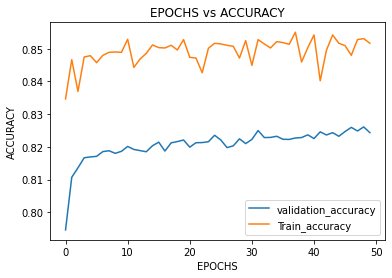

In [ ]:
dropout1 = 0.2
dropout2 = 0.5
dropout3 = 0.75
epochs =50

m, t, train_time_base,accuracies,loss,val_loss,val_accuracies = tuning(dropout1,'adam','random_normal')
fig1 = plt.figure()
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),accuracies)
plt.plot(list(range(epochs)),val_accuracies)
plt.legend(["validation_accuracy","Train_accuracy"],loc = 'lower right')


Train_Accuracy: 82.564056 when Dropout = 0.5, optimizer = adam, initializer = random_normal
Test_Accuracy: 85.095710 when Dropout = 0.5, optimizer = adam, initializer = random_normal


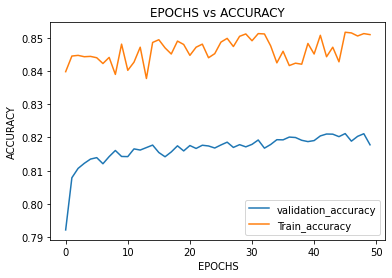

In [ ]:
m, t, train_time_base,accuracies,loss,val_loss,val_accuracies = tuning(dropout2,'adam','random_normal')
fig2 = plt.figure()

plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),accuracies)
plt.plot(list(range(epochs)),val_accuracies)
plt.legend(["validation_accuracy","Train_accuracy"],loc = 'lower right')


Train_Accuracy: 81.879610 when Dropout = 0.75, optimizer = adam, initializer = random_normal
Test_Accuracy: 84.757906 when Dropout = 0.75, optimizer = adam, initializer = random_normal


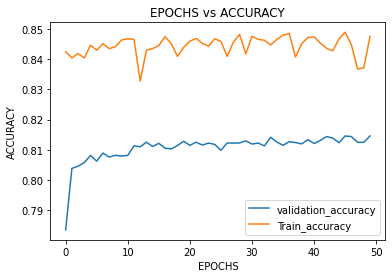

In [ ]:
m, t, train_time_base,accuracies,loss,val_loss,val_accuracies = tuning(dropout3,'adam','random_normal')
fig3 = plt.figure()

plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),accuracies)
plt.plot(list(range(epochs)),val_accuracies)
plt.legend(["validation_accuracy","Train_accuracy"],loc = 'lower right')

<b><h4>OPTIMIZER TUNING</h4></b>

Train_Accuracy: 82.678133 when Dropout = 0.2, optimizer = adam, initializer = random_normal
Test_Accuracy: 85.095710 when Dropout = 0.2, optimizer = adam, initializer = random_normal


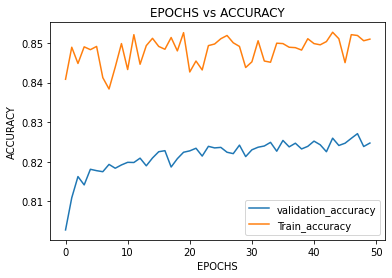

In [ ]:
optimizer1 = 'adam'
optimizer2 = 'sgd'
optimizer3 = 'rmsprop'

m, t, train_time_base,accuracies,loss,val_loss,val_accuracies = tuning(0.2,optimizer1,'random_normal')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),accuracies)
plt.plot(list(range(epochs)),val_accuracies)
plt.legend(["validation_accuracy","Train_accuracy"],loc = 'lower right')

Train_Accuracy: 81.168830 when Dropout = 0.2, optimizer = sgd, initializer = random_normal
Test_Accuracy: 84.000409 when Dropout = 0.2, optimizer = sgd, initializer = random_normal


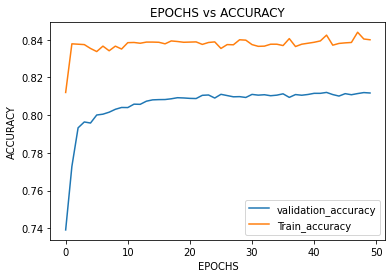

In [ ]:

m, t, train_time_base,accuracies,loss,val_loss,val_accuracies = tuning(0.2,optimizer2,'random_normal')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),accuracies)
plt.plot(list(range(epochs)),val_accuracies)
plt.legend(["validation_accuracy","Train_accuracy"],loc = 'lower right')

Train_Accuracy: 82.199895 when Dropout = 0.2, optimizer = rmsprop, initializer = random_normal
Test_Accuracy: 85.003585 when Dropout = 0.2, optimizer = rmsprop, initializer = random_normal


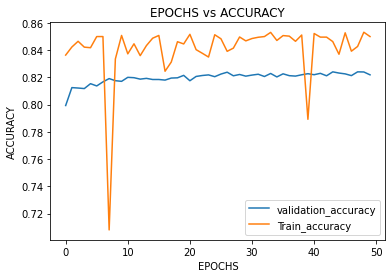

In [ ]:

m, t, train_time_base,accuracies,loss,val_loss,val_accuracies = tuning(0.2,optimizer3,'random_normal')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),accuracies)
plt.plot(list(range(epochs)),val_accuracies)
plt.legend(["validation_accuracy","Train_accuracy"],loc = 'lower right')

<b><h4>INITIALIZER TUNING</h4></b>

Train_Accuracy: 82.621098 when Dropout = 0.2, optimizer = adam, initializer = random_normal
Test_Accuracy: 84.450811 when Dropout = 0.2, optimizer = adam, initializer = random_normal


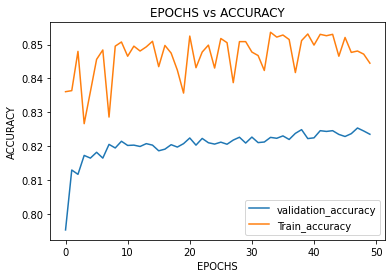

In [ ]:
initializer1 = 'random_normal'
initializer2 = 'zeros'
initializer3 = 'random_uniform'

m, t, train_time_base,accuracies,loss,val_loss,val_accuracies = tuning(0.2,'adam',initializer1)
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),accuracies)
plt.plot(list(range(epochs)),val_accuracies)
plt.legend(["validation_accuracy","Train_accuracy"],loc = 'lower right')


Train_Accuracy: 73.850477 when Dropout = 0.2, optimizer = adam, initializer = zeros
Test_Accuracy: 80.745214 when Dropout = 0.2, optimizer = adam, initializer = zeros


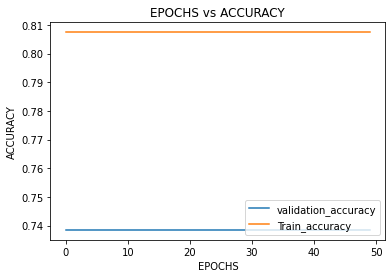

In [ ]:
m, t, train_time_base,accuracies,loss,val_loss,val_accuracies = tuning(0.2,'adam',initializer2)
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),accuracies)
plt.plot(list(range(epochs)),val_accuracies)
plt.legend(["validation_accuracy","Train_accuracy"],loc = 'lower right')

Train_Accuracy: 82.533348 when Dropout = 0.2, optimizer = adam, initializer = random_uniform
Test_Accuracy: 85.249257 when Dropout = 0.2, optimizer = adam, initializer = random_uniform


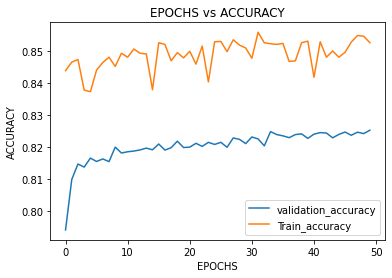

In [ ]:
m, t, train_time_base,accuracies,loss,val_loss,val_accuracies = tuning(0.2,'adam',initializer3)
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),accuracies)
plt.plot(list(range(epochs)),val_accuracies)
plt.legend(["validation_accuracy","Train_accuracy"],loc = 'lower right')

<h4>Best Accuracy is obtained with the combination of <b>DROPOUT</b> = 0.2, <b>OPTIMIZER</b> = 'adam' and <b>INITIALIZER</b> = 'random_uniform'<h4>

In [ ]:
m, t, train_time_base,accuracies1,loss1,val_loss1,val_accuracies1 = tuning(0.2,'adam','random_uniform')

Train_Accuracy: 82.722008 when Dropout = 0.2, optimizer = adam, initializer = random_uniform
Test_Accuracy: 85.044527 when Dropout = 0.2, optimizer = adam, initializer = random_uniform


In [ ]:
accuracies1 = m.history['accuracy']
loss1 = m.history['loss']
val_loss1 = m.history['val_loss']
val_accuracies1 = m.history['val_accuracy']
print("Training Time: ",train_time_base)

Training Time:  65.93239569664001


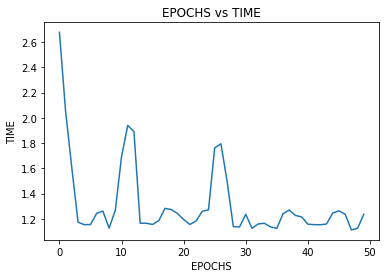

In [ ]:
epochs = 50
plt.xlabel("EPOCHS")
plt.ylabel("TIME")
plt.title("EPOCHS vs TIME")
plt.plot(list(range(epochs)),t)
#plt.legend(["validation_accuracy","Train_accuracy"],loc = 'lower right')

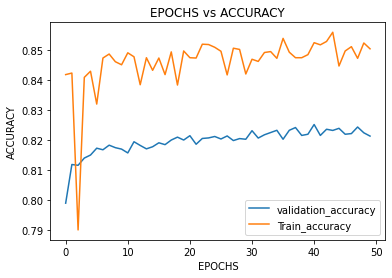

In [ ]:
epochs = 50
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),accuracies1)
plt.plot(list(range(epochs)),val_accuracies1)
plt.legend(["validation_accuracy","Train_accuracy"],loc = 'lower right')

OPTIMIZATION METHODS

In [ ]:
from time import time
class timecalc(keras.callbacks.Callback):
  def on_train_begin(self, logs = {}):
    self.timeslist = []

  def on_epoch_begin(self, batch, logs = {}):
    self.starttime = time()

  def on_epoch_end(self, batch, logs = {}):
    self.timeslist.append(time() - self.starttime)

<h3> K-FOLD Optimization Method </h3>

In [84]:
X1 = np.array(data[data.columns[:-1]])
Y1 = np.array(data['income'])
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)
for train_index, test_index in kf.split(X1):
  print("TRAIN:", train_index, "TEST:", test_index)
  train_x1, test_x1 = X1[train_index], X1[test_index]
  train_y1, test_y1 = Y1[train_index].reshape((len(train_index),1)), Y1[test_index].reshape((len(test_index),1))

TRAIN: [10854 10855 10856 ... 32558 32559 32560] TEST: [    0     1     2 ... 10851 10852 10853]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [10854 10855 10856 ... 21705 21706 21707]
TRAIN: [    0     1     2 ... 21705 21706 21707] TEST: [21708 21709 21710 ... 32558 32559 32560]


In [85]:
train_x1.shape, train_y1.shape, test_x1.shape, test_y1.shape

((21708, 13), (21708, 1), (10853, 13), (10853, 1))

In [86]:
h1,h2,h3 = 1250,30,30
epochs,batch_size = 50,64
x,y = train_x,train_y

nn_model1 = Sequential()

h_layer1 = Dense(h1, kernel_initializer='random_uniform',input_dim=13, activation='linear')
nn_model1.add(h_layer1)

h_layer2 = Dense(h2, activation='linear')
nn_model1.add(h_layer2)

nn_model1.add(Dropout(0.2))

h_layer3 = Dense(h3, activation='relu')
nn_model1.add(h_layer3)

output_layer = Dense(1, activation='sigmoid')
nn_model1.add(output_layer)

nn_model1.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])

time_callback = timecalc()
train_start = time()
m1 = nn_model1.fit(x, y, epochs = epochs, batch_size = batch_size, callbacks = [time_callback], verbose = 1,validation_data=(test_x,test_y))
train_time1 = time() - train_start

nn_model1.evaluate(x, y,verbose=1)
nn_model1.evaluate(test_x, test_y,verbose=1)

Epoch 1/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1430 - accuracy: 0.7965 - val_loss: 0.1127 - val_accuracy: 0.8400
Epoch 2/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1292 - accuracy: 0.8120 - val_loss: 0.1077 - val_accuracy: 0.8458
Epoch 3/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1264 - accuracy: 0.8138 - val_loss: 0.1160 - val_accuracy: 0.8366
Epoch 4/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1257 - accuracy: 0.8152 - val_loss: 0.1065 - val_accuracy: 0.8468
Epoch 5/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1263 - accuracy: 0.8123 - val_loss: 0.1057 - val_accuracy: 0.8465
Epoch 6/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1249 - accuracy: 0.8155 - val_loss: 0.1049 - val_accuracy: 0.8476
Epoch 7/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1244 - accuracy: 0.8184 - val_loss: 0.1136 - val_accuracy: 0.8341
Epoch 

[0.10396213829517365, 0.8489097952842712]

In [87]:
t1 = time_callback.timeslist
len(t)
print("TRAINING TIME USING K-FOLD METHOD:",train_time1)

TRAINING TIME USING K-FOLD METHOD: 142.4215543270111


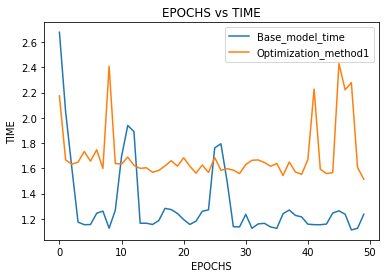

In [88]:
epochs = 50
plt.xlabel("EPOCHS")
plt.ylabel("TIME")
plt.title("EPOCHS vs TIME")
plt.plot(list(range(epochs)),t)
plt.plot(list(range(epochs)),t1)
plt.legend(["Base_model_time","Optimization_method1"],loc = 'upper right')

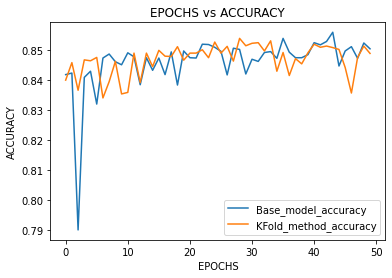

In [89]:
accuracies2 = m1.history['accuracy']
val_accuracies2 = m1.history['val_accuracy']

epochs = 50
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),val_accuracies1)
plt.plot(list(range(epochs)),val_accuracies2)
plt.legend(["Base_model_accuracy","KFold_method_accuracy"],loc = 'lower right')

<h3> EarlyStopping Optimization Method </h3> 

In [ ]:
h1,h2,h3 = 1250,30,30
epochs,batch_size = 50,64
x,y = train_x,train_y

nn_model3 = Sequential()

h_layer1 = Dense(h1, kernel_initializer='random_uniform',input_dim=13, activation='linear')
nn_model3.add(h_layer1)

h_layer2 = Dense(h2, activation='linear')
nn_model3.add(h_layer2)

nn_model3.add(Dropout(0.2))

h_layer3 = Dense(h3, activation='relu')
nn_model3.add(h_layer3)

output_layer = Dense(1, activation='sigmoid')
nn_model3.add(output_layer)

nn_model3.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])

callback = e_stopping(monitor = 'loss', patience = 4,mode = 'auto')
time_callback = timecalc()

start_time = time()
m2 = nn_model3.fit(x, y, epochs = epochs, batch_size = batch_size, callbacks = [callback, time_callback], verbose = 1,validation_data=(test_x,test_y))
train_time2 = time() - start_time

nn_model3.evaluate(x, y,verbose=1)
nn_model3.evaluate(test_x, test_y,verbose=1)

Epoch 1/50
382/382 [==============================] - 2s 5ms/step - loss: 0.1394 - accuracy: 0.7993 - val_loss: 0.1095 - val_accuracy: 0.8424
Epoch 2/50
382/382 [==============================] - 2s 4ms/step - loss: 0.1277 - accuracy: 0.8142 - val_loss: 0.1158 - val_accuracy: 0.8344
Epoch 3/50
382/382 [==============================] - 2s 5ms/step - loss: 0.1253 - accuracy: 0.8172 - val_loss: 0.1089 - val_accuracy: 0.8402
Epoch 4/50
382/382 [==============================] - 2s 5ms/step - loss: 0.1247 - accuracy: 0.8170 - val_loss: 0.1168 - val_accuracy: 0.8319
Epoch 5/50
382/382 [==============================] - 3s 7ms/step - loss: 0.1249 - accuracy: 0.8147 - val_loss: 0.1069 - val_accuracy: 0.8439
Epoch 6/50
382/382 [==============================] - 3s 9ms/step - loss: 0.1236 - accuracy: 0.8190 - val_loss: 0.1101 - val_accuracy: 0.8407
Epoch 7/50
382/382 [==============================] - 3s 7ms/step - loss: 0.1237 - accuracy: 0.8186 - val_loss: 0.1055 - val_accuracy: 0.8459
Epoch 

[0.10953475534915924, 0.8421375751495361]

In [ ]:
e_stopping_times = time_callback.timeslist
train_time2
accuracies3 = m2.history['accuracy']
val_accuracies3 = m2.history['val_accuracy']
print("TRAINING TIME USING EARLY STOPPING METHOD:",train_time2)

TRAINING TIME USING EARLY STOPPING METHOD: 31.33127498626709


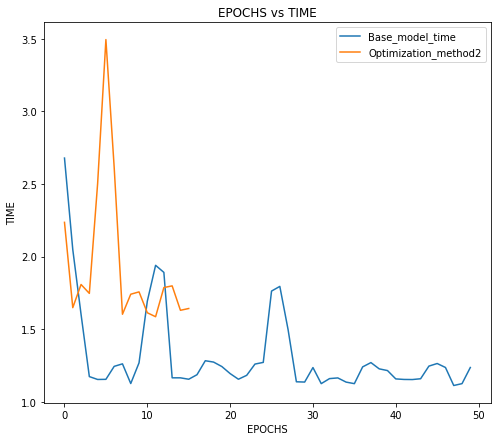

In [ ]:
epochs = 50
plt.figure(figsize = (8,7))
plt.xlabel("EPOCHS")
plt.ylabel("TIME")
plt.title("EPOCHS vs TIME")
plt.plot(list(range(epochs)),t)
plt.plot(list(range(len(val_accuracies3))),e_stopping_times)
plt.legend(["Base_model_time","Optimization_method2"],loc = 'upper right')

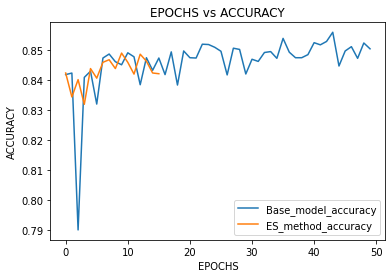

In [ ]:
epochs = 50
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),val_accuracies1)
plt.plot(list(range(len(val_accuracies3))),val_accuracies3)
plt.legend(["Base_model_accuracy","ES_method_accuracy"],loc = 'lower right')

<h3> Learning Rate Scheduler Optimization Method </h3> 

In [90]:
h1,h2,h3 = 1250,30,30
epochs,batch_size = 50,64
x,y = train_x,train_y

nn_model2 = Sequential()

h_layer1 = Dense(h1, kernel_initializer='random_uniform',input_dim=13, activation='linear')
nn_model2.add(h_layer1)

h_layer2 = Dense(h2, activation='linear')
nn_model2.add(h_layer2)

nn_model2.add(Dropout(0.2))

h_layer3 = Dense(h3, activation='relu')
nn_model2.add(h_layer3)

output_layer = Dense(1, activation='sigmoid')
nn_model2.add(output_layer)


nn_model2.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])

def scheduler(epoch, lr):
  if epoch < 10:
    print(epoch)
    return lr
  else:
    return lr * np.exp(-0.1)

callback = keras.callbacks.LearningRateScheduler(scheduler)
time_callback = timecalc()

start_time = time()
m2 = nn_model2.fit(x, y, epochs = epochs, batch_size = batch_size, callbacks = [callback, time_callback], verbose = 1,validation_data=(test_x,test_y))
train_time3 = time() - start_time

nn_model2.evaluate(x, y,verbose=1)
nn_model2.evaluate(test_x, test_y,verbose=1)

0
Epoch 1/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1412 - accuracy: 0.7976 - val_loss: 0.1116 - val_accuracy: 0.8397 - lr: 0.0010
1
Epoch 2/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1302 - accuracy: 0.8096 - val_loss: 0.1116 - val_accuracy: 0.8371 - lr: 0.0010
2
Epoch 3/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1274 - accuracy: 0.8116 - val_loss: 0.1070 - val_accuracy: 0.8460 - lr: 0.0010
3
Epoch 4/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1262 - accuracy: 0.8135 - val_loss: 0.1066 - val_accuracy: 0.8467 - lr: 0.0010
4
Epoch 5/50
357/357 [==============================] - 2s 4ms/step - loss: 0.1251 - accuracy: 0.8153 - val_loss: 0.1104 - val_accuracy: 0.8402 - lr: 0.0010
5
Epoch 6/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1252 - accuracy: 0.8154 - val_loss: 0.1045 - val_accuracy: 0.8488 - lr: 0.0010
6
Epoch 7/50
357/357 [==============================] - 2s

[0.10280303657054901, 0.8519807457923889]

In [91]:
t3 = time_callback.timeslist
train_time3
print("TRAINING TIME USING Learning Rate Scheduler METHOD:",train_time2)

TRAINING TIME USING Learning Rate Scheduler METHOD: 31.33127498626709


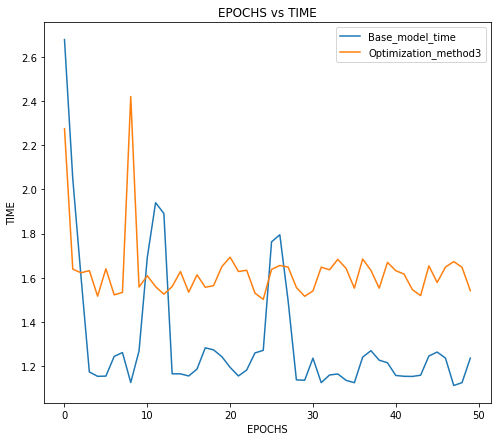

In [92]:
epochs = 50
plt.figure(figsize = (8,7))
plt.xlabel("EPOCHS")
plt.ylabel("TIME")
plt.title("EPOCHS vs TIME")
plt.plot(list(range(epochs)),t)
plt.plot(list(range(epochs)),t3)
plt.legend(["Base_model_time","Optimization_method3"],loc = 'upper right')

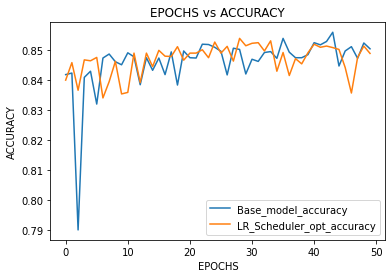

In [93]:
accuracies3 = m1.history['accuracy']
val_accuracies3 = m1.history['val_accuracy']

epochs = 50
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),val_accuracies1)
plt.plot(list(range(epochs)),val_accuracies3)
plt.legend(["Base_model_accuracy","LR_Scheduler_opt_accuracy"],loc = 'lower right')

<h3> Regularization Optimisation </h3>

In [94]:
h1,h2,h3 = 1250,30,30
epochs,batch_size = 50,64
x,y = train_x,train_y

nn_model4 = Sequential()

h_layer1 = Dense(h1, kernel_initializer='random_uniform',kernel_regularizer='l2', input_dim=13, activation='linear')
nn_model4.add(h_layer1)

h_layer2 = Dense(h2, kernel_regularizer='l2', activation='linear')
nn_model4.add(h_layer2)

nn_model4.add(Dropout(0.2))

h_layer3 = Dense(h3, kernel_regularizer='l2', activation='relu')
nn_model4.add(h_layer3)

output_layer = Dense(1, activation='sigmoid')
nn_model4.add(output_layer)

nn_model4.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])

time_callback = timecalc()

start_time = time()
m4 = nn_model4.fit(x, y, epochs = epochs, batch_size = batch_size, callbacks = [time_callback], verbose = 1,validation_data=(test_x,test_y))
train_time4 = time() - start_time

nn_model4.evaluate(x, y,verbose=1)
nn_model4.evaluate(test_x, test_y,verbose=1)

Epoch 1/50
357/357 [==============================] - 2s 5ms/step - loss: 0.3186 - accuracy: 0.7561 - val_loss: 0.1731 - val_accuracy: 0.8416
Epoch 2/50
357/357 [==============================] - 2s 4ms/step - loss: 0.1804 - accuracy: 0.7932 - val_loss: 0.1528 - val_accuracy: 0.8423
Epoch 3/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1733 - accuracy: 0.8023 - val_loss: 0.1484 - val_accuracy: 0.8224
Epoch 4/50
357/357 [==============================] - 2s 4ms/step - loss: 0.1697 - accuracy: 0.8040 - val_loss: 0.1503 - val_accuracy: 0.8389
Epoch 5/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1681 - accuracy: 0.8017 - val_loss: 0.1477 - val_accuracy: 0.8419
Epoch 6/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1664 - accuracy: 0.8026 - val_loss: 0.1427 - val_accuracy: 0.8429
Epoch 7/50
357/357 [==============================] - 2s 5ms/step - loss: 0.1658 - accuracy: 0.8035 - val_loss: 0.1414 - val_accuracy: 0.8414
Epoch 

[0.13353905081748962, 0.8404135704040527]

In [95]:
t4 = time_callback.timeslist
train_time4
print("TRAINING TIME USING REGULARIZATION METHOD:",train_time4)

TRAINING TIME USING REGULARIZATION METHOD: 83.93567061424255


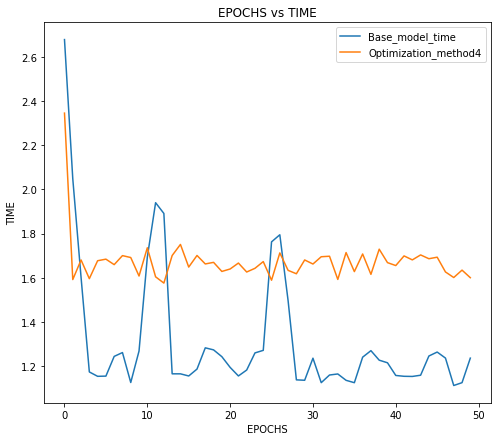

In [96]:
epochs = 50
plt.figure(figsize = (8,7))
plt.xlabel("EPOCHS")
plt.ylabel("TIME")
plt.title("EPOCHS vs TIME")
plt.plot(list(range(epochs)),t)
plt.plot(list(range(epochs)),t4)
plt.legend(["Base_model_time","Optimization_method4"],loc = 'upper right')

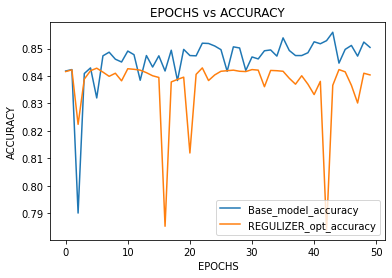

In [97]:
accuracies4 = m4.history['accuracy']
val_accuracies4 = m4.history['val_accuracy']

epochs = 50
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("EPOCHS vs ACCURACY")
plt.plot(list(range(epochs)),val_accuracies1)
plt.plot(list(range(epochs)),val_accuracies4)
plt.legend(["Base_model_accuracy","REGULIZER_opt_accuracy"],loc = 'lower right')

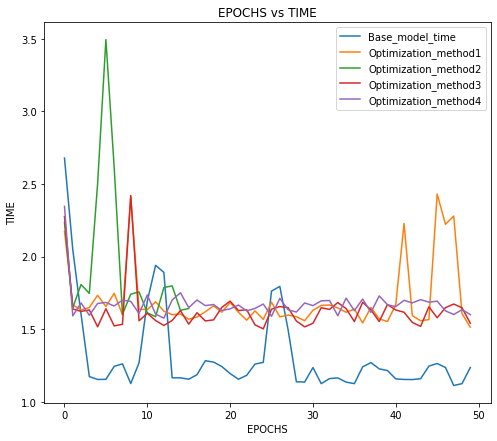

In [101]:
epochs = 50
plt.figure(figsize = (8,7))
plt.xlabel("EPOCHS")
plt.ylabel("TIME")
plt.title("EPOCHS vs TIME")
plt.plot(list(range(epochs)),t)
plt.plot(list(range(epochs)),t1)
plt.plot(list(range(16)),e_stopping_times)
plt.plot(list(range(epochs)),t3)
plt.plot(list(range(epochs)),t4)
plt.legend(["Base_model_time","Optimization_method1","Optimization_method2","Optimization_method3","Optimization_method4"],loc = 'upper right')

*References*: 

https://www.tutorialspoint.com/keras/keras_convolution_neural_network.htm <br>
https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a <br>
https://www.kaggle.com/code/stefanie04736/simple-keras-model-with-k-fold-cross-validation/notebook<br>
https://www.analyticsvidhya.com/blog/2021/11/training-neural-network-with-keras-and-basics-of-deep-learning/ <br>